In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

In [3]:
data = pd.read_csv('data.csv')
data.head(5)

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,...,Private Notes,Read Count,Recommended For,Recommended By,Owned Copies,Original Purchase Date,Original Purchase Location,Condition,Condition Description,BCID
0,42423839,Hunting the Nazi Bomb: The Special Forces Miss...,Damien Lewis,"Lewis, Damien",NaN,"=""""","=""""",0,4.48,Open Road Media,...,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,54860351,Axiom's End (Noumena #1),Lindsay Ellis,"Ellis, Lindsay",NaN,"=""1250798132""","=""9781250798138""",0,3.80,St. Martin's Griffin,...,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,55585159,Bound For Texas,Kit Prate,"Prate, Kit",NaN,"=""""","=""""",0,4.14,NaN,...,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,58555585,Captain Nemo: The Fantastic History of a Dark ...,Kevin J. Anderson,"Anderson, Kevin J.",NaN,"=""""","=""""",0,3.73,Audible Studios,...,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4,28449123,Red Right Hand (Michael Hendricks #2),Chris Holm,"Holm, Chris",NaN,"=""031625956X""","=""9780316259569""",0,3.94,Mulholland Books,...,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6379 entries, 0 to 6378
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Book Id                     6379 non-null   int64  
 1   Title                       6379 non-null   object 
 2   Author                      6379 non-null   object 
 3   Author l-f                  6379 non-null   object 
 4   Additional Authors          1209 non-null   object 
 5   ISBN                        6379 non-null   object 
 6   ISBN13                      6379 non-null   object 
 7   My Rating                   6379 non-null   int64  
 8   Average Rating              6379 non-null   float64
 9   Publisher                   6174 non-null   object 
 10  Binding                     6343 non-null   object 
 11  Number of Pages             6175 non-null   float64
 12  Year Published              6288 non-null   float64
 13  Original Publication Year   6159 

In [5]:
pd.isna(data).sum()

Book Id                          0
Title                            0
Author                           0
Author l-f                       0
Additional Authors            5170
ISBN                             0
ISBN13                           0
My Rating                        0
Average Rating                   0
Publisher                      205
Binding                         36
Number of Pages                204
Year Published                  91
Original Publication Year      220
Date Read                     5987
Date Added                       0
Bookshelves                   2219
Bookshelves with positions    2219
Exclusive Shelf                  0
My Review                     6371
Spoiler                       6379
Private Notes                 6379
Read Count                       0
Recommended For               6379
Recommended By                6379
Owned Copies                     0
Original Purchase Date        6379
Original Purchase Location    6379
Condition           

In [6]:
data1 = data.copy()
data1 = data1.drop(data1.columns[[0,3,4,5,6, 9, 10, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]], axis=1)

data1.fillna(0)
data1 = data1.astype({'My Rating': np.float64} )

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6379 entries, 0 to 6378
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      6379 non-null   object 
 1   Author                     6379 non-null   object 
 2   My Rating                  6379 non-null   float64
 3   Average Rating             6379 non-null   float64
 4   Number of Pages            6175 non-null   float64
 5   Year Published             6288 non-null   float64
 6   Original Publication Year  6159 non-null   float64
 7   Date Read                  392 non-null    object 
 8   Date Added                 6379 non-null   object 
dtypes: float64(5), object(4)
memory usage: 448.6+ KB


In [8]:
data1.corr().abs()[['My Rating']]

,My Rating
My Rating,1.000000
Average Rating,0.100958
Number of Pages,0.084042
Year Published,0.138556
Original Publication Year,0.092948


In [9]:
data1['Rating_Pages'] =  data1.apply(lambda row: int((row['My Rating'] + row['Number of Pages'])> 0), axis=1)
data1.corr().abs()[['My Rating']]

,My Rating
My Rating,1.000000
Average Rating,0.100958
Number of Pages,0.084042
Year Published,0.138556
Original Publication Year,0.092948
Rating_Pages,0.052498


In [10]:
data1 = data1[['My Rating','Average Rating','Number of Pages','Year Published']].dropna()

C:\Users\Chaos\anaconda3\envs\VSCode_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Average Rating')

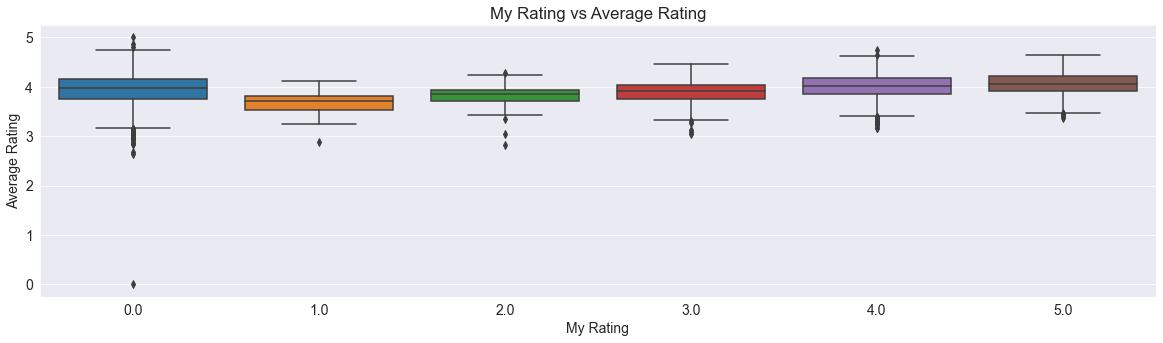

In [11]:
sns.boxplot('My Rating', 'Average Rating', data=data1)
plt.title('My Rating vs Average Rating')
plt.ylabel('Average Rating')

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [13]:
x_train, x_test, y_train, y_test = train_test_split(data1[['My Rating','Average Rating','Number of Pages','Year Published']], data1['My Rating'], test_size=0.2, random_state=0)

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [15]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [16]:
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

1.0


In [17]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [18]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 25        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
153/153 [==============================] - 0s 970us/step - loss: 0.5797 - accuracy: 0.0074
Epoch 2/50
153/153 [==============================] - 0s 714us/step - loss: -0.4244 - accuracy: 0.4389
Epoch 3/50
153/153 [==============================] - 0s 670us/step - loss: -3.5025 - accuracy: 0.6365
Epoch 4/50
153/153 [==============================] - 0s 649us/step - loss: -9.5706 - accuracy: 0.6380
Epoch 5/50
153/153 [==============================] - 0s 662us/step - loss: -19.8772 - accuracy: 0.6310
Epoch 6/50
153/153 [==============================] - 0s 592us/step - loss: -35.4478 - accuracy: 0.6216
Epoch 7/50
153/153 [==============================] - 0s 548us/step - loss: -57.1423 - accuracy: 0.6224
Epoch 8/50
153/153 [==============================] - 0s 600us/step - loss: -85.8499 - accuracy: 0.6189
Epoch 9/50
153/153 [==============================] - 0s 644us/step - loss: -121.8652 - accuracy: 0.6155
Epoch 10/50
153/153 [==============================] - 0s 670us/step

In [21]:
y_pred = model.predict_classes(X_test)
print(metrics.accuracy_score(y_test, y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.6124284546197875
